# <font color=green>Day- 2</font>
# Regression

### Topics under Discussion
1. Simple Regression
- Multi Variable Regression
- Polynomial Regression
- Non Linear Regression

### Sub Sections
    A. Importing Data
    B. Data Check and Cleaning
    C. EDA
    D. Appropriate Model Fittings
    E. Model Evaluation
    

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

# Evaluation Metrics Libraries
from sklearn.metrics import r2_score

## 1. Simple Regression


### 1A. Importing Data

In [2]:
data_path =  "./Dataset/Regression/simple_tvmarketing.csv"
df = pd.read_csv(data_path)
df.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### 1B. Data Check and Cleaning

In [3]:
# Initial Observations on Dataset
print('Initial Observations\n--------------------')
print('Number of observations = {0}\nNumber of Features = {1}'.format(df.shape[0],df.shape[1]))
print('Columns :',list(df.columns),"\n")

# Verification of datatypes
print('Datatypes\n---------')
print(df.dtypes)

Initial Observations
--------------------
Number of observations = 200
Number of Features = 2
Columns : ['TV', 'Sales'] 

Datatypes
---------
TV       float64
Sales    float64
dtype: object


In [4]:
# Missing Values Check
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [5]:
# Check for duplicate Observations
df.duplicated().sum()

0

In [6]:
# Unique Values Check
df.nunique()

TV       190
Sales    121
dtype: int64

### 1C. EDA

In [7]:
df_data =  df[['TV','Sales']]

In [8]:
df_data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

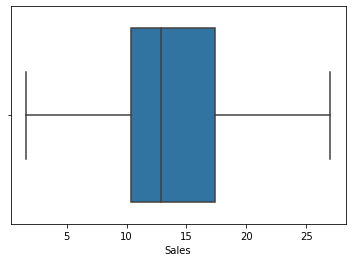

In [9]:
sns.boxplot(df["Sales"])

Text(0.5, 1.0, 'TV vs Sales')

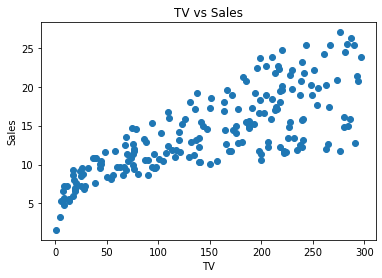

In [10]:
plt.scatter(df_data["TV"],df_data["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")

- The Observations from the scatter plot are
    - The "Sales" are nearly increasing linearly with increase in "TV"
    - The data points are quite scatttered with increase in"TV" feature
 
- From above observations we can decide to fit the model to a linear regression

### 1D. Modelling

In [11]:
# Train Test Split
X = np.array((df_data["TV"])).reshape(-1,1)
Y = np.array(df_data["Sales"])
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.30, random_state = 4)

In [12]:
# Model Fitting
model = LinearRegression()
model.fit(train_x,train_y)

# Model Parameters
print(model.coef_, model.intercept_)

[0.04821738] 6.811731598147776


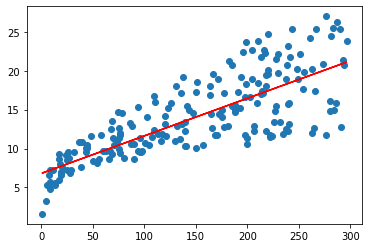

In [13]:
# Plotting Model Fit
Y_pred = model.coef_*X + model.intercept_
plt.scatter(X,Y)
plt.plot(X,Y_pred, color="red")

### 1E. Model Evaluation

In [14]:
# Predictions
pred = model.predict(test_x)

# Error
# print("Mean Absolute Error : {0}".format(np.mean(np.absolute(pred,test_y))))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred) )

Residual sum of squares (MSE): 11.40
R2-score: 0.55


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

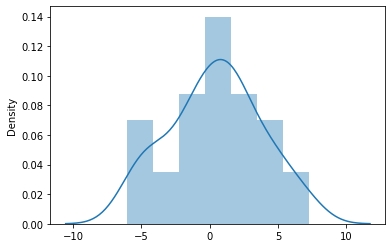

In [15]:
sns.distplot((test_y-pred))

## 2. Multiple Regression Model

/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

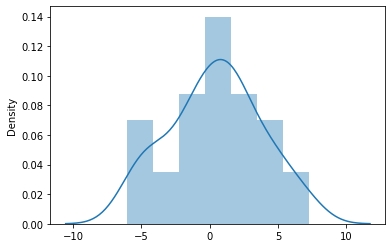

In [16]:
sns.distplot((test_y-pred))

### 2A. Importing Data

In [17]:
data_path =  "./Dataset/Regression/multiple_FuelConsumption.csv"
df = pd.read_csv(data_path)
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### 2B. Data Check and Cleaning

In [18]:
# Initial Observations on Dataset
print('Initial Observations\n--------------------')
print('Number of observations = {0}\nNumber of Features = {1}'.format(df.shape[0],df.shape[1]))
print('Columns :',list(df.columns),"\n")

# Verification of datatypes
print('Datatypes\n---------')
print(df.dtypes)

Initial Observations
--------------------
Number of observations = 1067
Number of Features = 13
Columns : ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'] 

Datatypes
---------
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [19]:
# Missing Values Check
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [20]:
# Check for duplicate Observations
df.duplicated().sum()

0

In [21]:
# Unique Values Check
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

<AxesSubplot:>

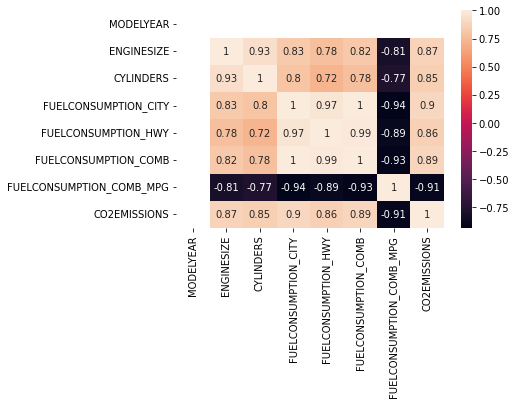

In [22]:
sns.heatmap(df.corr(), annot =True)

- From Above heat map it is evident that FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG are highly related t each other. So we have to drop 3/4 features to avoid multi collinearity.
- We SHall drop MODELYEAR too as it doesnt affect to the putput
- We will include FUELCONSUMPTION_COMB and drop others

In [23]:
df_new = df.drop(["MODELYEAR","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"],axis =1)

### 2C. EDA

<AxesSubplot:>

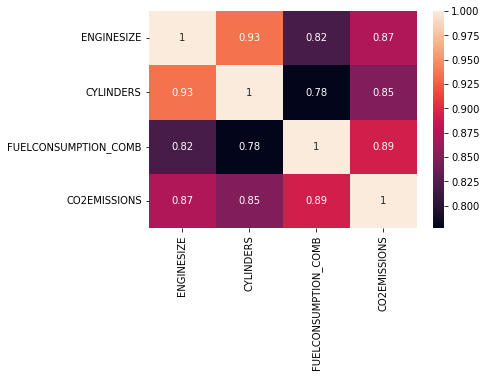

In [24]:
sns.heatmap(df_new.corr(),annot = True)

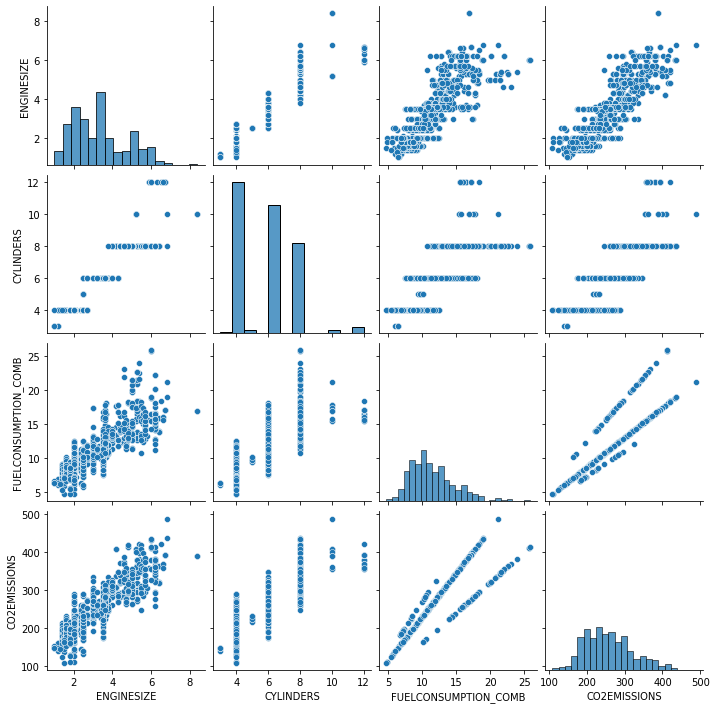

In [25]:
sns.pairplot(df_new)

We can observe that 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB' affect 'CO2EMISSIONS' linearly. This is a proble of Multi Linear Regression

### 2D. Modelling

In [26]:
# Data Preparation
X = df_new[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Y = df_new["CO2EMISSIONS"]

train_x, test_x, train_y,test_y = train_test_split(X,Y,test_size = 0.2, random_state = 7)
print(X.shape,Y.shape, train_x.shape,test_x.shape, train_y.shape, test_y.shape)

(1067, 3) (1067,) (853, 3) (214, 3) (853,) (214,)


In [27]:
# Model
model = LinearRegression()
model.fit(train_x,train_y)

# Model Parameters
print("Coef : {0} \nIntercepts : {1}".format(list(model.coef_),model.intercept_))

Coef : [10.784646148291666, 7.739218902133263, 9.544948902891411] 
Intercepts : 64.43443439727096


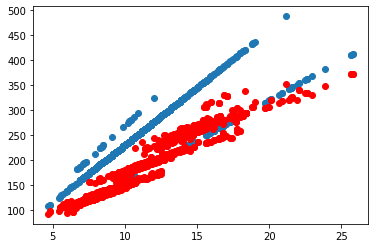

In [28]:
coef = list(model.coef_)
Y_pred = coef[0]*X['ENGINESIZE'] + coef[1]*X['CYLINDERS'] + coef[2]*X['FUELCONSUMPTION_COMB']


plt.scatter(X['FUELCONSUMPTION_COMB'],Y)
plt.scatter(X['FUELCONSUMPTION_COMB'],Y_pred, color='red')

### 2E. Model Evaluation

In [29]:
# Predictions
pred = model.predict(test_x)

# Error
# print("Mean Absolute Error : {0}".format(np.mean(np.absolute(pred,test_y))))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred) )

Residual sum of squares (MSE): 418.48
R2-score: 0.88


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

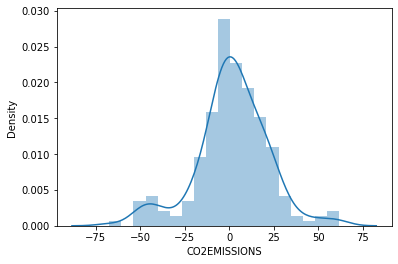

In [30]:
sns.distplot((test_y-pred))

## 3. Polynomial Regression

In [31]:
data_path =  "./Dataset/Regression/polynomial_Fish.csv"
df = pd.read_csv(data_path)
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 3B. Data Check and Cleaning

In [32]:
# Initial Observations on Dataset
print('Initial Observations\n--------------------')
print('Number of observations = {0}\nNumber of Features = {1}'.format(df.shape[0],df.shape[1]))
print('Columns :',list(df.columns))
print('Target Variable : Weight',"\n")

# Verification of datatypes
print('Datatypes\n---------')
print(df.dtypes)

Initial Observations
--------------------
Number of observations = 159
Number of Features = 7
Columns : ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
Target Variable : Weight 

Datatypes
---------
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


In [33]:
# Missing Values Check
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [34]:
# Check for duplicate Observations
df.duplicated().sum()

0

In [35]:
# Unique Values Check
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

<AxesSubplot:>

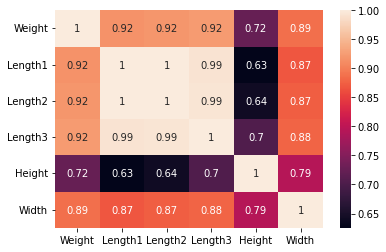

In [36]:
sns.heatmap(df.corr(), annot =True)

- The Length1, Length2, Length3 have a very high correlation among them and the other vaiables. This causes multi collinearity. Lets drop Length1, Length2, Length3

In [37]:
df.drop(["Length1","Length2","Length3"], axis = 1, inplace = True)

In [38]:
# Handling Outliers
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR 
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

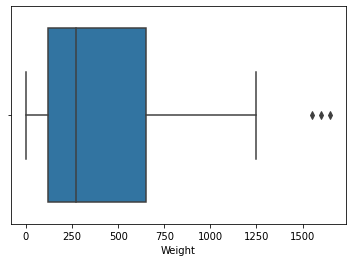

In [39]:
# Outliers in Weights
sns.boxplot(df["Weight"])

 This shows that we have few outliers in weight. Similarly there might be outlighers in other coloumns too. Lets print them all

In [40]:
for column in df.columns[1:]:
    print(column)
    print(outlier_detection(df[column]),"\n")
    

Weight
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64 

Height
Series([], Name: Height, dtype: float64) 

Width
Series([], Name: Width, dtype: float64) 



Although we find 3 data points pointing that we have an outlier in weight. We must be very cautious in hanfdling them as we have a small dataset. We might accidently remove a data point of a species of fish which has very less observations.

Hence species wise outlier investigation needs to be performed to cfind detailed information about outliers. But out project is mainly focussed on Model Training not EDA. Hence we would be skipping that part as of now

In [41]:
# One Hot Encoding
df_new = pd.get_dummies(df,prefix='',prefix_sep='',columns=["Species"])
df_new 

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
154,12.2,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,2.8728,2.0672,0,0,0,0,0,1,0


### 3C. EDA

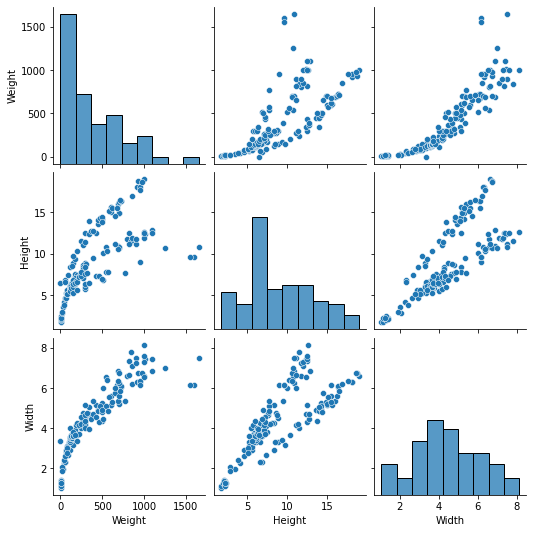

In [42]:
sns.pairplot(df, kind = 'scatter')

Seeing the pair plot we can clearly say the variables are related to each other in a polynomial fashion

We can apply polynommial regression on the model and train the model
As out target variable is "Weight"

### 3D. Modelling

In [43]:
# Data Preparation
X = df_new.drop(["Weight"],axis=1)
Y = df_new[["Weight"]]
train_x,test_x, train_y, test_y = train_test_split(X,Y,test_size = 0.2, random_state = 7)
print(X.shape,Y.shape, train_x.shape,test_x.shape, train_y.shape, test_y.shape)

(159, 9) (159, 1) (127, 9) (32, 9) (127, 1) (32, 1)


In [44]:
# Data Tranform
poly = PolynomialFeatures(degree=2)
poly_trainData = poly.fit_transform(train_x)

# Model Fitting
model = LinearRegression()
model.fit(poly_trainData,train_y)

# Model Parameters
# print("Coef : {0} \nIntercepts : {1}".format(list(model.coef_),model.intercept_))

LinearRegression()

### 3E. Model Evaluation

In [45]:
# Predictions
poly_trainData = poly.fit_transform(test_x)
pred = model.predict(poly_trainData)

# Error
# print("Mean Absolute Error : {0}".format(np.mean(np.absolute(pred,test_y))))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred) )

Residual sum of squares (MSE): 4481.23
R2-score: 0.95


/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## 4. Non Linear Regression

Non Linear Functions
- **Exponential** : $$ Y = a + b c^X$$
- **Logarithmic** : \begin{equation} y = \log(X) \end{equation}
- **Sigmoid** : $$ Y = a + \frac{b}{1+ c^{(X-d)}}$$
- **Logistic** : $$ Y = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

### 4A. Importing Data

In [46]:
data_path =  "./Dataset/Regression/nonLinear_chinaGdp.csv"
df = pd.read_csv(data_path)
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### 4B. Data Check and Cleaning

In [47]:
# Initial Observations on Dataset
print('Initial Observations\n--------------------')
print('Number of observations = {0}\nNumber of Features = {1}'.format(df.shape[0],df.shape[1]))
print('Columns :',list(df.columns),"\n")

# Verification of datatypes
print('Datatypes\n---------')
print(df.dtypes)

Initial Observations
--------------------
Number of observations = 55
Number of Features = 2
Columns : ['Year', 'Value'] 

Datatypes
---------
Year       int64
Value    float64
dtype: object


In [48]:
# Missing Values Check
df.isnull().sum()

Year     0
Value    0
dtype: int64

In [49]:
# Check for duplicate Observations
df.duplicated().sum()

0

In [50]:
# Unique Values Check
df.nunique()

Year     55
Value    55
dtype: int64

### 4C. EDA

/home/unknown/anaconda3/envs/GPU/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

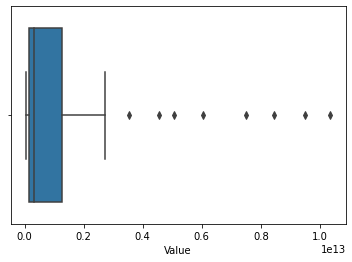

In [51]:
sns.boxplot(df["Value"])

In [52]:
outlier_detection(df["Value"])

47    3.523094e+12
48    4.558431e+12
49    5.059420e+12
50    6.039659e+12
51    7.492432e+12
52    8.461623e+12
53    9.490603e+12
54    1.035483e+13
Name: Value, dtype: float64

The current data shows 8 data points as outlier out of 55 data points. We cant risk removing them as they might be containing a crucial information

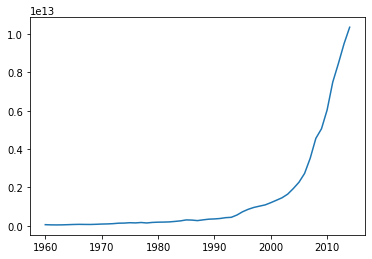

In [53]:
plt.plot(df["Year"],df["Value"])

Few Clear observations are 
- Initially the GRaph increased very slowly
- Theres a steep rise in middle
- The graph seems settling as it reaches the top

This implies the data in the form of a sigmoid function

### 4D. Modelling

In [54]:
# Train Test Split
X = df["Year"].values
Y = df["Value"].values

In [55]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

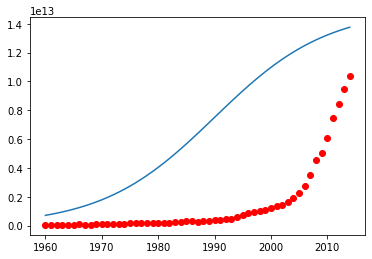

In [56]:
beta_1 = 0.10
beta_2 = 1990.0
Y_pred = sigmoid(X, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(X, Y_pred*15000000000000.)
plt.plot(X, Y, 'ro')

In [57]:
# Lets normalize our data
xdata =X/max(X)
ydata =Y/max(Y)


train_x,test_x,train_y,test_y = train_test_split(xdata,ydata,test_size=0.40, random_state = 4)

popt, pcov = curve_fit(sigmoid, train_x, train_y)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.460703, beta_2 = 0.997267


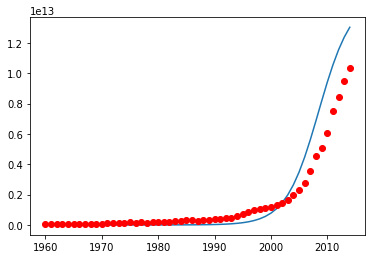

In [58]:
Y_pred = sigmoid(xdata, *popt)

# Model After Training
plt.plot(X, Y_pred*15000000000000.)
plt.plot(X, Y, 'ro')

### 4E. Model Evaluation

In [59]:
# Predictions
pred = sigmoid(test_x, *popt)

# Error
# print("Mean Absolute Error : {0}".format(np.mean(np.absolute(pred,Y))))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , pred) )

Residual sum of squares (MSE): 0.00
R2-score: 0.96


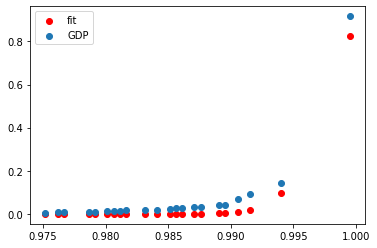

In [60]:
plt.scatter(test_x,pred,color='red', label='fit')
plt.scatter(test_x,test_y, label='GDP')
plt.legend()